In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#Reading the data from train.csv and test.csv
#train.csv will have an extra column for the label
train_df = pd.read_csv("train.csv")
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test_df = pd.read_csv("test.csv")
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print("Training data shape:", train_df.shape)

Training data shape: (42000, 785)


In [5]:
print("Testing data shape:", test_df.shape)

Testing data shape: (28000, 784)


# Check if the labels are in shuffled order or not, i.e data is randomized or not

In [6]:
#printing first 20 labels
print(train_df.label[:20])

0     1
1     0
2     1
3     4
4     0
5     0
6     7
7     3
8     5
9     3
10    8
11    9
12    1
13    3
14    3
15    1
16    2
17    0
18    7
19    5
Name: label, dtype: int64


# Get data into numpy arrays

In [7]:
train_df_values = train_df.values
training_data, training_labels = train_df_values[:, 1:], train_df_values[:, 0]
print(training_data.shape, training_labels.shape)

(42000, 784) (42000,)


In [8]:
#testing data from kaggle, will be used for submission 
final_testing_data = test_df.values
print(final_testing_data.shape)

(28000, 784)


# Split data into training and testing data

In [9]:
#doing train_test_split on training data
from sklearn.model_selection import train_test_split

In [10]:
#train_test_split?

In [11]:
X_train, X_test, y_train, y_test = train_test_split(training_data, training_labels, 
                                                    test_size=0.2,
                                                    random_state=42
                                                   )

In [12]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33600, 784) (8400, 784) (33600,) (8400,)


# Displaying first 25 images

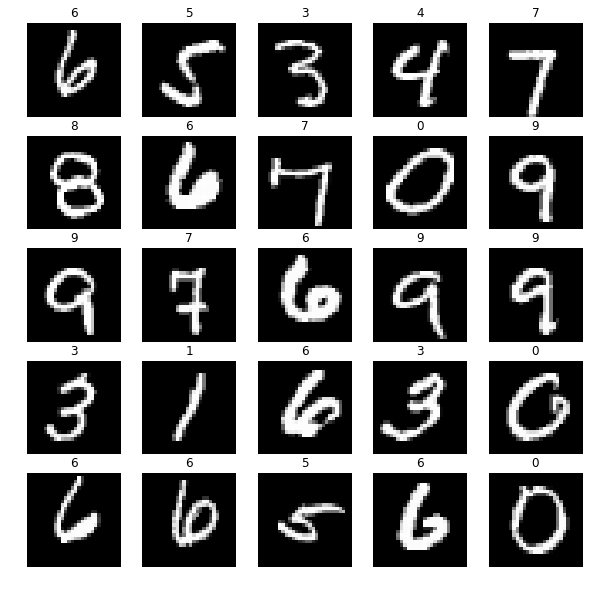

In [13]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(y_train[i])
    plt.axis("off")
plt.show()

# converting linear image data into (28, 28) shape format

In [14]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
final_testing_data = final_testing_data.reshape(final_testing_data.shape[0], 28, 28, 1)
print(X_train.shape)
print(X_test.shape)
print(final_testing_data.shape)

(33600, 28, 28, 1)
(8400, 28, 28, 1)
(28000, 28, 28, 1)


# Normalizing pixel values

In [15]:
#normalize the pixel values for each image, we can do this
#by dividing by 255
X_train = X_train/255.0
X_test = X_test/255.0
final_testing_data = final_testing_data/255.0

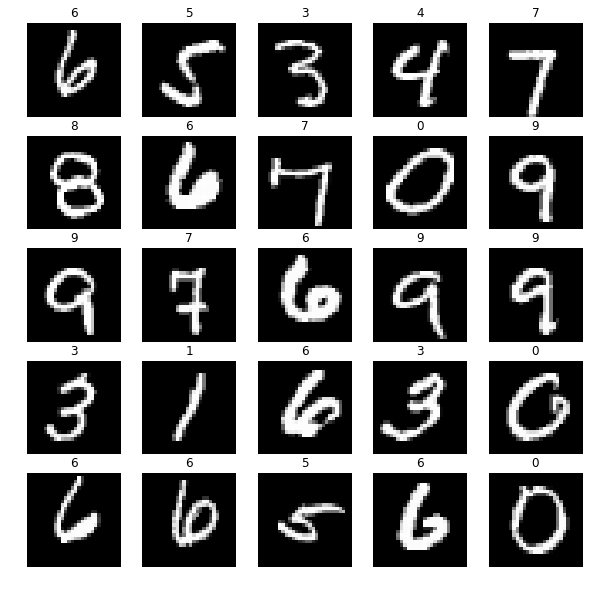

In [16]:
#checking that the images have not been affected
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(y_train[i])
    plt.axis("off")
plt.show()

In [17]:
#checking keras version
import keras

In [18]:
print(keras.__version__)

2.4.3


In [19]:
#import libraries to create CNN model
#to convert label into categorical data
from keras.utils import to_categorical
#CNN will be a sequential model
from keras.models import Sequential
#for 2D convolutions
from keras.layers import Conv2D
#for 2D maxpooling at each layer
from keras.layers import MaxPooling2D
#for last layer
from keras.layers import Dense
from keras.layers import Flatten
#optimizer
from keras.optimizers import SGD, Adam
from sklearn.model_selection import KFold

In [20]:
#defining model
def define_model():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(2, 2))
    #model.add(Conv2D(64, (3, 3), activation='relu'))
    #model.add(MaxPooling2D(2, 2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    #optimizer 
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy',
                  metrics=['accuracy']
                 )
    print(model.summary())
    return model

In [21]:
# evaluating model using K-fold cross validation
def evaluate_model(X, Y, n_folds=7):
    scores, histories, testing_accuracies = [], [], []
    
    #store the weights in best model
    best_model = None
    best_acc = 0.0
    #prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=42)
    
    for train_idx, test_idx in kfold.split(X): 
        model = define_model()
        X_train, y_train = X[train_idx], Y[train_idx]
        X_test, y_test = X[test_idx], Y[test_idx]
        
        #convert classes labels to categorical features
        y_train = to_categorical(y_train)
        y_test = to_categorical(y_test)
        
        #fit model
        history = model.fit(X_train, y_train, epochs=10, batch_size=32,
                            validation_data=(X_test, y_test), verbose=1
                           )
        _, acc = model.evaluate(X_test, y_test, verbose=1)
        print('>%3f'%(acc*100))
        #if accuracy at last training step is better than 
        #the previous model then store the model 
        if acc>best_acc:
            best_model = model
            
        #append the accuracies to testing_accuracies
        testing_accuracies.append(acc*100)
        
        #append store
        scores.append(acc)
        histories.append(history)
    return best_model, scores, histories, testing_accuracies

In [22]:
#plot loss and accuracy curves
def summarize_diagnostics(histories):
    plt.figure(figsize=(10, 10))
    for i in range(len(histories)):
        #plotting loss
        plt.subplot(2, 1, 1)
        plt.title("Cross Entropy Loss")
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='test')
        plt.legend()
        plt.subplot(2, 1, 2)
        plt.title("Accuracy")
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
        plt.legend()
    plt.show()   

In [23]:
def predict_with_best_model(best_model, X):
    return best_model.predict_classes(X)

In [24]:
#train your data
best_model, scores, histories, testing_accuracies = evaluate_model(X_train, y_train, 5)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1384576   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
840/840 [==============================] - 8s 7ms/step - loss: 0.6157 - accuracy: 0.8121 - val_l

Epoch 1/10
840/840 [==============================] - 6s 6ms/step - loss: 0.6241 - accuracy: 0.8155 - val_loss: 0.1622 - val_accuracy: 0.9507
Epoch 2/10
840/840 [==============================] - 5s 6ms/step - loss: 0.1327 - accuracy: 0.9604 - val_loss: 0.1205 - val_accuracy: 0.9624
Epoch 3/10
840/840 [==============================] - 5s 6ms/step - loss: 0.0816 - accuracy: 0.9749 - val_loss: 0.0917 - val_accuracy: 0.9704
Epoch 4/10
840/840 [==============================] - 5s 6ms/step - loss: 0.0574 - accuracy: 0.9831 - val_loss: 0.0807 - val_accuracy: 0.9741
Epoch 5/10
840/840 [==============================] - 5s 6ms/step - loss: 0.0416 - accuracy: 0.9880 - val_loss: 0.0749 - val_accuracy: 0.9754
Epoch 6/10
840/840 [==============================] - 5s 6ms/step - loss: 0.0282 - accuracy: 0.9913 - val_loss: 0.0714 - val_accuracy: 0.9789
Epoch 7/10
840/840 [==============================] - 5s 6ms/step - loss: 0.0251 - accuracy: 0.9930 - val_loss: 0.0681 - val_accuracy: 0.9792
Epoch 

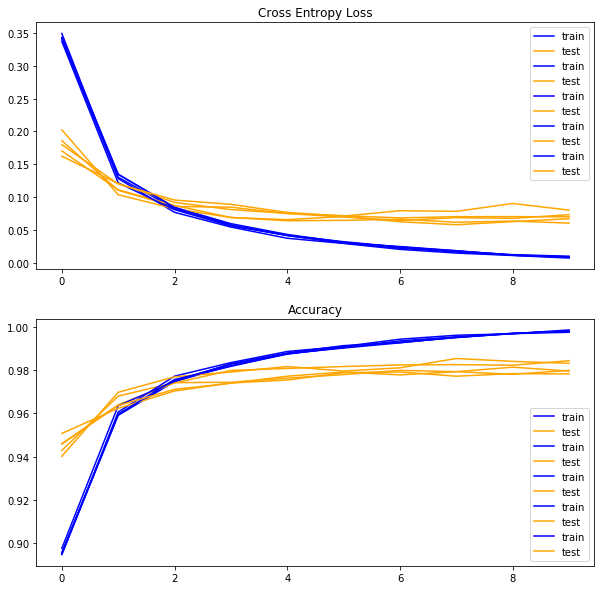

In [25]:
summarize_diagnostics(histories)

In [26]:
print(testing_accuracies)

[97.96130657196045, 98.31845164299011, 98.4375, 97.82738089561462, 97.99107313156128]


In [29]:
#predictions = best_model.predict_classes(final_testing_data)
predictions = np.argmax(best_model.predict(final_testing_data), axis=-1)
print(predictions)

[2 0 9 ... 3 9 2]


In [32]:
answer_dict = {
    'ImageId': [i+1 for i in range(len(predictions))],
    'Label': predictions
}

In [33]:
answers_df = pd.DataFrame(answer_dict)

In [34]:
answers_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [36]:
answers_df.to_csv('digit_recognizer_answers.csv', index=False)